## Perform Exploratory Data Analysis - Correlation
- Examine the level of correlation between each feature
- Examine their level of correlation to the outcome (response feature)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the cleaned source file into a DataFrame.
data_dir = os.path.join(os.getcwd(), 'Data')
source_file = os.path.join(data_dir, 'WA-Telco-Customer-Churn-ML.csv')
df = pd.read_csv(source_file, header=0, index_col=0)

# Drop the Unique Identifier
df = df.drop(labels=['Customerid'], axis=1)

In [3]:
# Make appropriate data type assignments.
def set_datatypes(dframe):
    for col in dframe.columns:
        if dframe[col].dtypes.str.startswith('int'):
            dframe[col] = pd.to_numeric(dframe[col],
                                        downcast='integer',
                                        errors='coerce')
            
        elif dframe[col].dtypes.str.startswith('float'):
            dframe[col] = pd.to_numeric(dframe[col],
                                        downcast='float',
                                        errors='coerce')
            
        elif dframe[col].dtypes == 'object':
            dframe[col] = dframe[col].astype('category')
        
    return dframe

df = set_datatypes(df)

# Validate new data type assignments.
df.dtypes

Gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
Tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

### Examine Correlations Among the Entire Feature-Set

In [4]:
# Create a Pearson Correlation Matrix of the Entire Feature-Set
df.corr('pearson')  # default | kendall | spearman rank

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
Tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374410,-0.195525


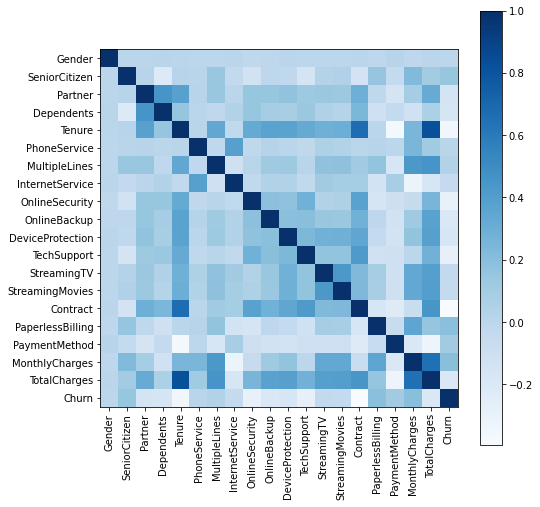

In [5]:
# Plot a Colorbar of the Entire Feature-Set
plt.figure(figsize=(8,8))
plt.imshow(df.corr('pearson'), cmap=plt.cm.Blues, interpolation='nearest')
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
plt.colorbar()

### Examine Correlations Among Only the Continuous Numerical Features and Churn

In [6]:
# Create a Pearson Correlation Matrix of the Continuous Numerical Features and the Response (Churn)
num_df = df[['Tenure','MonthlyCharges','TotalCharges', 'Churn']]
num_df.corr('pearson')

,Tenure,MonthlyCharges,TotalCharges,Churn
Tenure,1.000000,0.247900,0.826178,-0.352229
MonthlyCharges,0.247900,1.000000,0.651174,0.193356
TotalCharges,0.826178,0.651174,1.000000,-0.198324
Churn,-0.352229,0.193356,-0.198324,1.000000


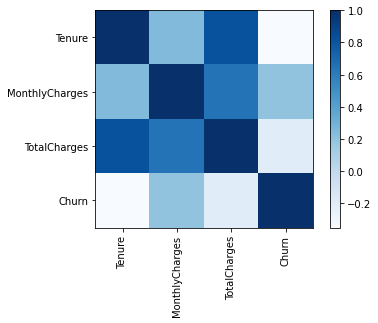

In [7]:
# Plot a Colorbar of the Continuous Numerical Features and the Response (Churn)
plt.imshow(num_df.corr('pearson'), cmap=plt.cm.Blues, interpolation='nearest')
tick_marks = [i for i in range(len(num_df.columns))]
plt.xticks(tick_marks, num_df.columns, rotation='vertical')
plt.yticks(tick_marks, num_df.columns)
plt.colorbar()

### Examine Correlations Among Only PhoneService, MultipleLines and Churn

In [8]:
# Create a Spearman Correlation Matrix of Only PhoneService, MultipleLines and Churn.
phoneline_df = df[['PhoneService','MultipleLines','Churn']]
phoneline_df.rank()
phoneline_df.corr('spearman')

,PhoneService,MultipleLines,Churn
PhoneService,1.000000,-0.037431,0.011942
MultipleLines,-0.037431,1.000000,0.037816
Churn,0.011942,0.037816,1.000000


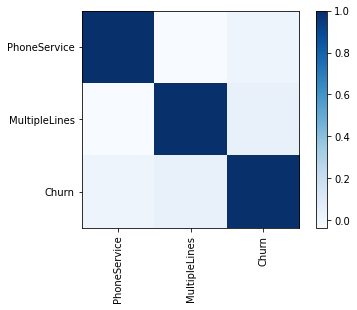

In [9]:
# Plot a Colorbar of Only PhoneService, MultipleLines and Churn. 
plt.imshow(phoneline_df.corr('spearman'), cmap=plt.cm.Blues, interpolation='nearest')
tick_marks = [i for i in range(len(phoneline_df.columns))]
plt.xticks(tick_marks, phoneline_df.columns, rotation='vertical')
plt.yticks(tick_marks, phoneline_df.columns)
plt.colorbar()

### Examine Correlations Between the Internet-Related Services and Churn

In [10]:
# Plot a Spearman Correlation Matrix of Only the Internet-Related Services and Churn.
intsvcs_df = df[['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                 'TechSupport','StreamingTV','StreamingMovies', 'Churn']]
intsvcs_df.rank()
intsvcs_df.corr('spearman') # spearman rank

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
InternetService,1.000000,0.020074,0.060925,0.070848,0.020815,0.119093,0.107663,-0.028690
OnlineSecurity,0.020074,1.000000,0.194121,0.185368,0.303877,0.045926,0.056147,-0.303918
OnlineBackup,0.060925,0.194121,1.000000,0.192148,0.204336,0.147611,0.136782,-0.203189
DeviceProtection,0.070848,0.185368,0.192148,1.000000,0.248710,0.276711,0.288430,-0.185998
TechSupport,0.020815,0.303877,0.204336,0.248710,1.000000,0.161038,0.160178,-0.296815
StreamingTV,0.119093,0.045926,0.147611,0.276711,0.161038,1.000000,0.434803,-0.037854
StreamingMovies,0.107663,0.056147,0.136782,0.288430,0.160178,0.434803,1.000000,-0.039147
Churn,-0.028690,-0.303918,-0.203189,-0.185998,-0.296815,-0.037854,-0.039147,1.000000


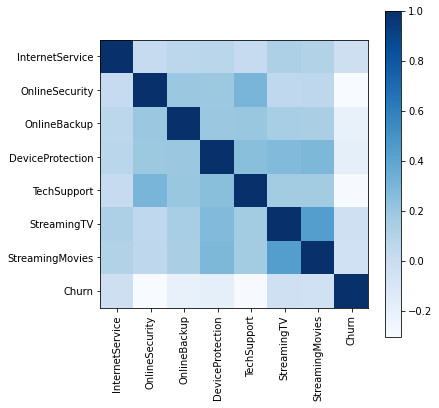

In [11]:
# Plot a Colorbar of Only the Internet-Related Services and Churn.
plt.figure(figsize=(6,6))
plt.imshow(intsvcs_df.corr('spearman'), cmap=plt.cm.Blues, interpolation='nearest')
tick_marks = [i for i in range(len(intsvcs_df.columns))]
plt.xticks(tick_marks, intsvcs_df.columns, rotation='vertical')
plt.yticks(tick_marks, intsvcs_df.columns)
plt.colorbar()

### Examine Correlation Between the Remaining Independent Categorical Features and Churn

In [12]:
# Plot a Spearman Correlation Matrix of Only the Remaining Independent Categorical Features and Churn.
ind_df = df[['Gender','SeniorCitizen','Partner','Dependents','Contract','PaperlessBilling','PaymentMethod', 'Churn']]
ind_df.rank()
ind_df.corr('spearman') # spearman rank

,Gender,SeniorCitizen,Partner,Dependents,Contract,PaperlessBilling,PaymentMethod,Churn
Gender,1.000000,-0.001874,-0.001808,0.010517,0.001094,-0.011754,0.017119,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,-0.143850,0.156530,-0.043703,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.295925,-0.014877,-0.155247,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.244120,-0.111377,-0.037590,-0.164221
Contract,0.001094,-0.143850,0.295925,0.244120,1.000000,-0.177617,-0.226507,-0.406262
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,-0.177617,1.000000,-0.070007,0.191825
PaymentMethod,0.017119,-0.043703,-0.155247,-0.037590,-0.226507,-0.070007,1.000000,0.102270
Churn,-0.008612,0.150889,-0.150448,-0.164221,-0.406262,0.191825,0.102270,1.000000


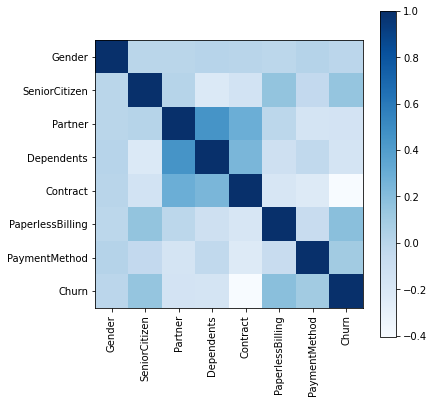

In [13]:
# Plot a Colorbar of Only the Remaining Independent Categorical Features and Churn.
plt.figure(figsize=(6,6))
plt.imshow(ind_df.corr('spearman'), cmap=plt.cm.Blues, interpolation='nearest')
tick_marks = [i for i in range(len(ind_df.columns))]
plt.xticks(tick_marks, ind_df.columns, rotation='vertical')
plt.yticks(tick_marks, ind_df.columns)
plt.colorbar()